# Exploratory Data Analysis

## 1. Importing Depandencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# "Show all columns, no matter how many there are." Without this option, pandas hides columns
pd.set_option('display.max_columns', None)

## 2. Loading dataset using `seaborn`
Use the **Titanic dataset** for demonstration.

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Data Overview

### Getting the shape of dataset

In [3]:
print("Shape:", df.shape)

Shape: (891, 15)


### Checking the `data types` of the dataset

In [4]:
print("Data Types:\n",df.dtypes)

Data Types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


### Getting a description about the dataset

In [5]:
df.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Getting description of **categorical** fields in the dataset

In [6]:
df.describe(include=["object","category"]).T

,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
deck,203,7,C,59
embark_town,889,3,Southampton,644
alive,891,2,no,549


### Counting the **missing values** in the dataset

In [7]:
print("\nMissing Values:\n",df.isnull().sum())


Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


## 4. Univariate Analysis

### Creating a `histogram` using `seaborn`

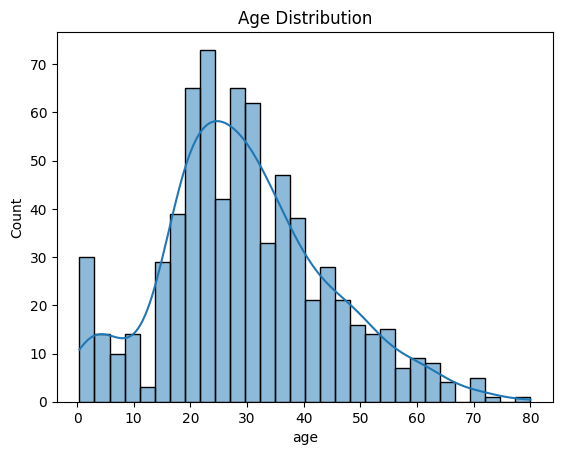

In [8]:
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

### Creating a `countplot` for the column **sex** of dataset

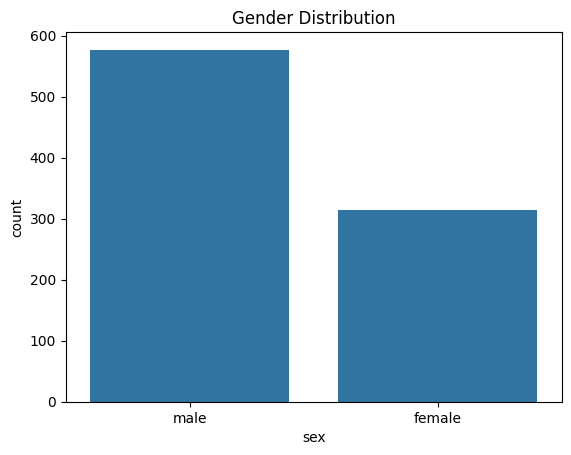

In [9]:
sns.countplot(data=df, x="sex")
plt.title("Gender Distribution")
plt.show()

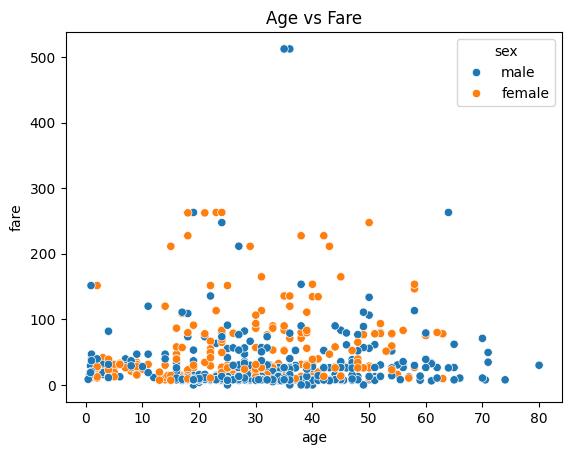

In [10]:
sns.scatterplot(data=df, x="age", y="fare", hue="sex")
plt.title("Age vs Fare")
plt.show()

### Creating a `boxplot` for **Age distribution by Gender**

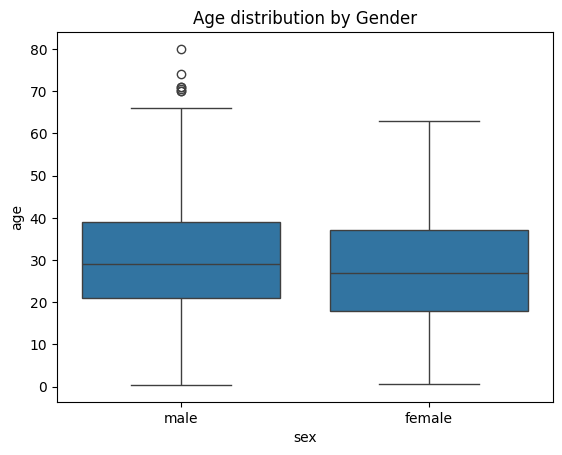

In [11]:
sns.boxplot(data=df, x="sex", y="age")
plt.title("Age distribution by Gender")
plt.show()

### Creating a `heatmap` for all the **numerical columns**

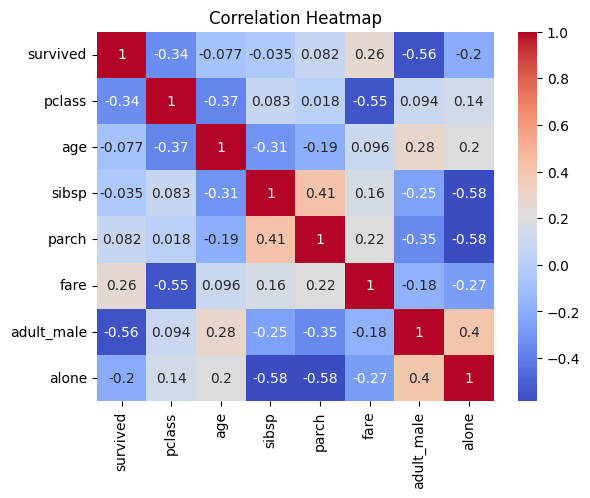

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 5. Data Cleaning

### Checking and Dropping **duplicate values** from dataset

In [14]:
# Check duplicates
print("Duplicate Rows:", df.duplicated().sum())

# Drop duplicates (if any)
df = df.drop_duplicates()

Duplicate Rows: 107


### Checking **missing values** for each columns in the dataset

In [15]:
print("\nMissing Values:\n",df.isnull().sum())


Missing Values:
 survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64
